# Check Data Quality 

In [263]:
pip install speechpy

Note: you may need to restart the kernel to use updated packages.


##  Imports

In [2]:
from scipy.io import wavfile
import tgt
import re
import collections
import os
import pandas as pd
import textgrids
import glob
import ipapy
from ipapy.ipachar import IPAVowel
import pickle
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
import numpy as np
from pydub import AudioSegment,silence
import librosa
import librosa.display
import textgrids
import seaborn as sns
import scipy
import numba 
from numba import jit
import time
import speechpy

/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Import data 

In [3]:
with open("./downsampled_audio/downsampled_audio_dictionary", "rb+") as f:
    downsample_dictionary = pickle.load(f)

In [4]:
with open("df_w_features", "rb+") as f:
    final_df = pickle.load(f)

In [5]:
with open("./downsampled_audio/downsampled_audio_list", "rb+") as f:
    downsample_list = pickle.load(f)

In [53]:
downsample_dictionary['ENF_02'].keys()

dict_keys(['original', 'Filter_25'])

# Getting acoustic data  

I won't be using duration to filter the vowels so it's a little useless to use duration as a filter. I think if I were to SEGMENT the vowels, then having a filter would be necessary. So if I WERE to filter the vowels at some point, I would need to use acoustic criteria that distinguishes vowels from consonants/semi-consonants

## Testing absolute level of energy for each type of sound with in a sound file (02-06)

apparently the values are given in the scipy.io.wavefile.read command 
https://dsp.stackexchange.com/questions/37674/is-there-a-function-in-python-which-returns-the-amplitude-sound-pressure-level-o
i.e.: I have the values already from when I separated channels, I just need to calculate each one for a certain interval

So my file is in the "16-bit PCM" format. Therefore, my max values are +/- 32767

I could get away with downsampling to 11,025 sampling rate b/c only 8,000 is needed for human speech- https://en.wikipedia.org/wiki/Sampling_(signal_processing)#Sampling_rate

In [7]:
enf_02_sound = wavfile.read("./split_wav_files_folder/ENF_02")

In [8]:
enf_02_sound[1].min()

-12887

In [9]:
enf_02_sound[1].shape

(11633672,)

In [10]:
type(enf_02_sound[1][0])

numpy.int16

So there are 22050 * 527.6 samples taken in the audio file. There are 527.6 seconds to the audio file. So each sample is 1/22050th of the audio file (i think. there might be some connection to the frequency measurement in there, too)

In [11]:
len(enf_02_sound[1]) / 22050

527.6041723356009

# Displays using librosa
https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

In [12]:
# I'm downsampling the data here to 8000 sr/max of 4000 Hz measurements (https://stackoverflow.com/questions/30619740/downsampling-wav-audio-file)
librosa_audio, sr = librosa.load("./original_en_diapix_data/DP_ENF_02_ENF_06_EN_ENF_02_DP_ENF_02_ENF_06_EN_ENF_06.wav", duration = 30, sr = 8000)

### Waveform

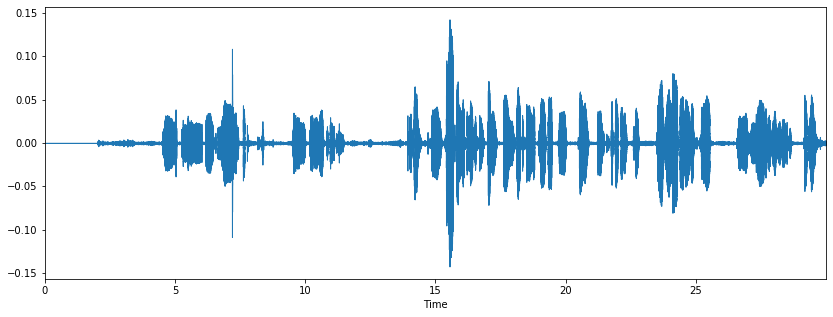

In [13]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(librosa_audio, sr=sr)
# plt.savefig('./Visualizations/Example_Waveform.png')

### Spectrogram

This chart shows how much useless info I'm getting from the signal (everything above 5,000 Hz). Will definitely need to downsample

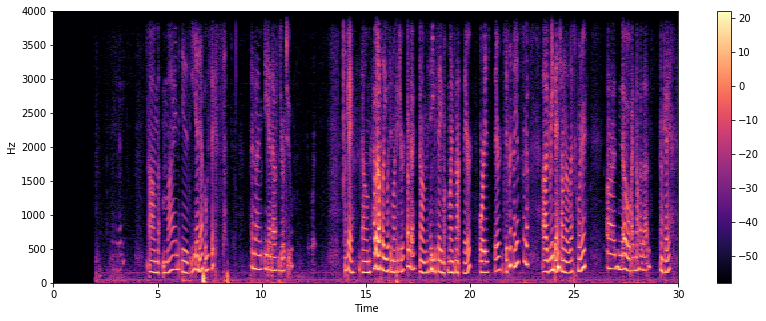

In [14]:
X = librosa.stft(librosa_audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
# plt.savefig('./Visualizations/Example_Spectrogram.png')

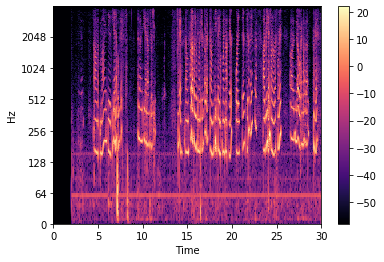

In [15]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### MFCC

(15, 469)


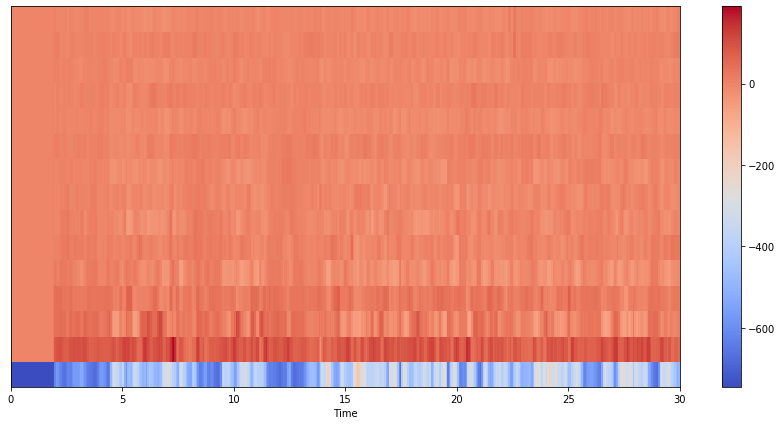

In [16]:
mfccs = librosa.feature.mfcc(librosa_audio, sr=sr, n_mfcc=15)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
# plt.savefig('./Visualizations/Example_MFCC.png')

In [17]:
mfccs.shape

(15, 469)

## Making a display of a vowel heavy portion

In [19]:
# I need portions between frames 77416.0 - 79016
9.877 * 8000

79016.0

In [20]:
x = downsample_dictionary['ENF_02']['Filter_25_sigma_1.5'][1]

KeyError: 'Filter_25_sigma_1.5'

In [21]:
#first index that contains "AY" is 3874 and the one after is 4289
for item in x[3000:6000]:
    if item > 79016:
        print(x.index(item))
        break

NameError: name 'x' is not defined

In [22]:
#getting the points into correct time
points_for_a = x[3874:4289]
len(points_for_a)

NameError: name 'x' is not defined

In [23]:
y = (np.array(points_for_a))
time_for_points_for_a = y * (1/8000)

NameError: name 'points_for_a' is not defined

In [24]:
y_axis = np.zeros(415,)
y_axis1 = y_axis - 3
x1 = #9.677 
x2 = 9.877

SyntaxError: invalid syntax (<ipython-input-24-dc7f3b69961e>, line 3)

Text(0.5, 1.0, "Example of the vowel in the word 'I' (9.67-9.87)")

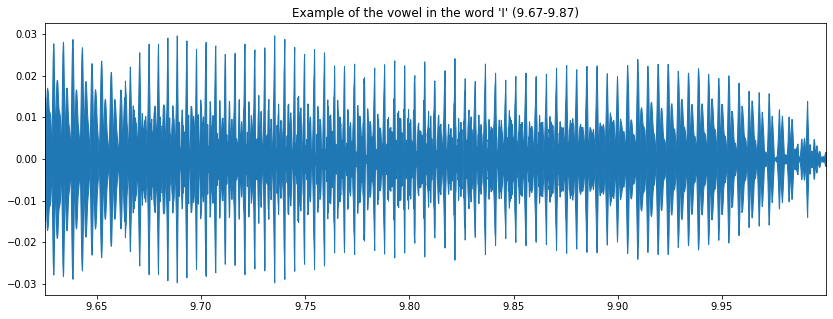

In [25]:
fig, ax = plt.subplots(figsize=(14, 5))
# plt.figure(figsize=(14, 5))
ax1 = librosa.display.waveplot(librosa_audio[77000:80000], sr=sr, ax=ax, x_axis = 'sec', offset = 9.625)
# ax.bar(time_for_points_for_a, height = 0.5)
# plt.fill_betweenx(0, x1, x2)
# sns.rugplot(time_for_points_for_a)
# fig, ax1 = plt.subplots()
# ax.plot(time_for_points_for_a, '|')
# plt.plot(y=0,x = 9.677)
ax.set_title("Example of the vowel in the word 'I' (9.67-9.87)")
# plt.savefig('./Visualizations/Example_Waveform_Vowel.png')

# Testing using pitch tracking

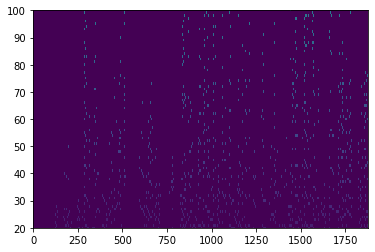

In [26]:
pitch, mag = librosa.core.piptrack(librosa_audio, sr=8000, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

# Using Hampel Filter
https://towardsdatascience.com/outlier-detection-with-hampel-filter-85ddf523c73d

In [27]:
@jit(nopython=True)
def hampel_filter_forloop_numba(input_series, window_size, n_sigmas=3):
    
    n = len(input_series)
    new_series = input_series.copy()
    k = 1.4826 # scale factor for Gaussian distribution
    indices = []
    
    for i in range((window_size),(n - window_size)):
        x0 = np.nanmedian(input_series[(i - window_size):(i + window_size)])
        S0 = k * np.nanmedian(np.abs(input_series[(i - window_size):(i + window_size)] - x0))
        if (np.abs(input_series[i] - x0) > n_sigmas * S0):
            new_series[i] = x0
            indices.append(i)
    
    return new_series, indices

# Evaluating results of hampel filter

In [28]:
# trying to see the values for the transformed audio and the index where it is considered to be voiced
first_voiced_moment = downsample_dictionary['ENF_02']['Filter_25'][1][0]

In [29]:
downsample_dictionary['ENF_02']['Filter_25'][0][first_voiced_moment]

-15.047568554299833

# Second attempt at making evaluating function

In [30]:
# make specific df
sp_2_vcd = final_df[(final_df['Speaker'] == '02') & (final_df['Voiced'] == 1)]

In [31]:
sp_2_vcd.reset_index(inplace= True)

### Trying to vectorize the checking results code
https://stackoverflow.com/questions/10062954/valueerror-the-truth-value-of-an-array-with-more-than-one-element-is-ambiguous

In [32]:
def check_ind_values(prediction, phone_max, phone_min):
    y = np.where((sp_2_vcd['Phone_xmax'].values >= prediction) & (prediction >= sp_2_vcd['Phone_xmin'].values), 1, 0)
    #it's somehow faster to do this rather than np.sum(y)
    if np.sum(y) == 1:
        return 1
    else:
        return 0

In [33]:
# add parameter hampel_filter and replace "Filter_25 with that"
def check_all_values(df, feature_to_check = "Vowel", speaker = "", hampel_filter = 'Filter_25', downsample_dictionary = downsample_dictionary):
    # getting the key for the speaker
    participants = downsample_dictionary.keys()
    for x in participants:
        if speaker in x:
            dict_key = x
    # making predictions from frames into seconds
    predictions = (np.array(downsample_dictionary[dict_key][hampel_filter][1])) / 8000
    
    # initializing values
    tp_pct = 0
    fp_pct = 0
#     fn = 0
    # breaking down the dataframe to the parts that I want
    small_df = df[(df[feature_to_check] == 1) & (df['Speaker'] == speaker)]
    xmax = small_df['Phone_xmax'].values
    xmin = small_df['Phone_xmin'].values
    #checking how many actual vowels/voiced segments were hit
    segment_success = np.zeros(len(xmin))
    for idx, x in enumerate(segment_success):
        for y in predictions:
            if xmin[idx] <= y <= xmax[idx]:
                segment_success[idx] = 1
                break
    segment_success_pct = np.count_nonzero(segment_success) / len(segment_success)
        
    #running the calculations
    prediction_results = np.array([check_ind_values(x, xmax, xmin) for x in predictions])

    # getting the total number of samples for the entire file
    predicted_ratio = len(downsample_dictionary[dict_key][hampel_filter][1]) / len(downsample_dictionary[dict_key][hampel_filter][0])
    # actual ratio
    actual_ratio = small_df['Phone_Duration'].sum() / (len(downsample_dictionary[dict_key][hampel_filter][0]) / 8000)
    
    # i can count percent of prediction_results are in the intervals
    tp_pct = np.count_nonzero(prediction_results) / len(prediction_results)
    fp_pct = (len(prediction_results) - np.count_nonzero(prediction_results)) / len(prediction_results)
    
    results_dict = {"predicted_ratio":round(predicted_ratio, 4), "actual_ratio": round(actual_ratio, 4),
                    "tp_pct": round(tp_pct, 4), "fp_pct": round(fp_pct, 4), "segment_success_pct": round(segment_success_pct, 4)}
    return results_dict

In [34]:
test_dict = check_all_values(final_df, speaker = '02', feature_to_check = 'Voiced')

In [35]:
test_dict

{'predicted_ratio': 0.0135,
 'actual_ratio': 0.0891,
 'tp_pct': 0.2853,
 'fp_pct': 0.7147,
 'segment_success_pct': 0.8358}

#### Figuring out how to calculate percent correct

In [36]:
len(downsample_dictionary['ENF_02']['original']) / 8000

527.604125

In [37]:
sp_2_vcd.Phone_Duration.sum()

47.00734121489405

In [38]:
47/ 527

0.08918406072106262

In [39]:
# THE original sound file has 9% of the file voiced 
sp_2_vcd.Phone_Duration.sum() / (len(downsample_dictionary['ENF_02']['original']) / 8000)

0.0890958561305677

In [40]:
# i covered 15% of the voiced segments....i think
(len(downsample_dictionary['ENF_02']['Filter_25'][1]) * (1/8000)) / sp_2_vcd.Phone_Duration.sum()

0.15205071836173856

In [41]:
len(downsample_dictionary['ENF_02']['Filter_25'][0])

4220833

In [42]:
# The filter predicts the file to have 1.4% of the signal to be voiced
len(downsample_dictionary['ENF_02']['Filter_25'][1]) / len(downsample_dictionary['ENF_02']['Filter_25'][0])

0.013547088927706924

In [43]:
# i actually have 15% of the signal covered
## I should try this with a lower sigma and then use a classification model on top of this 
0.013547088927706924 / 0.08918406072106262

0.15190033755109678

# Testing different sigmas effect on segment_success_pct

## Running the filter sigma 3 window 25 on speaker 3

In [44]:
len(downsample_dictionary['EN_03']['Filter_25'][1])

14634

In [45]:
results_03 = check_all_values(final_df, speaker = '03')

### Function to make results dict into df

In [46]:
def test_to_dict(speaker = "", final_df = final_df, hampel_filter = "Filter_25"):
    if speaker == "":
        return "You forgot to add a speaker"
    results_dict = check_all_values(final_df, speaker = speaker, hampel_filter = hampel_filter)
    df = pd.DataFrame.from_dict(results_dict, orient='index').T
    df['Speaker'] = speaker
    return df

In [47]:
df_5 = test_to_dict(speaker = '05')

In [48]:
# list of speaker ids
cwd = os.getcwd()
textgrid_names_list1 = glob.glob(cwd + "/split_wav_files_folder/*")
sound_files = [x[-2:] for x in textgrid_names_list1 if x[-1] != 'd']

In [49]:
sound_files

['02',
 '05',
 '03',
 '17',
 '10',
 '11',
 '18',
 '06',
 '06',
 '08',
 '09',
 '07',
 '14',
 '13',
 '13',
 '14']

In [56]:
#running the function on each participant and adding results to dict
vowel_3_25_df = pd.DataFrame()
for x in sound_files:
    df = test_to_dict(speaker = x)
    vowel_3_25_df = vowel_3_25_df.append(df)

In [57]:
#i get at least one prediction in between 53-96% of all true vowels
#between 7 and 29% of my predictions are actually in vowels

In [58]:
vowel_3_25_df.head(2)

,predicted_ratio,actual_ratio,tp_pct,fp_pct,segment_success_pct,Speaker
0,0.0135,0.1036,0.2853,0.7147,0.8742,02
0,0.0057,0.1416,0.0934,0.9066,0.7828,05


## Running Hampel Filter with larger window size 

In [59]:
# making sure I can add a key to the correct dictionary

In [60]:
# test hampel filter on one file with different window size # i want 0.025 seconds
window_size = 8000 * 0.025
window_size

200.0

In [61]:
sp_2_window200 = hampel_filter_forloop_numba(downsample_dictionary['ENF_02']['original'], 200, n_sigmas=3)

In [62]:
len(sp_2_window200[1])

31437

### For loop to get hampel filter for window = 200 and sigma = 3

In [63]:
for x in downsample_dictionary.keys():
# for x in ['ENF_02', 'EN_05']:
    if downsample_dictionary[x].get("Filter_200_sigma_3") == None:
        downsample_dictionary[x]["Filter_200_sigma_3"] = hampel_filter_forloop_numba(downsample_dictionary[x]['original'], 200, n_sigmas=3)

for x in downsample_dictionary.keys():
    if downsample_dictionary[x].get("Filter_200_sigma_3") == None:
        print(f"we missed the filter for speaker {x}")
    else:
        print(f"speaker {x} has the filter")

In [64]:
test_to_dict(speaker = "02", final_df = final_df, hampel_filter = "Filter_200_sigma_3")

,predicted_ratio,actual_ratio,tp_pct,fp_pct,segment_success_pct,Speaker
0,0.0074,0.1036,0.2062,0.7938,0.8247,02


In [65]:
# Error here!!
def make_df(sound_files = sound_files, hampel_filter = "Filter_25"):
    new_df = pd.DataFrame()
    for x in sound_files:
        df = test_to_dict(speaker = x, hampel_filter=hampel_filter)
        new_df = df.append(df)
    return new_df

In [66]:
def make_df_list(sound_files = sound_files, hampel_filter = "Filter_25"):
    df_list = []
    for x in sound_files:
        df = test_to_dict(speaker = x, hampel_filter=hampel_filter)
        df_list.append(df)
    new_df = pd.concat(df_list)
    return new_df

vowel_200_sigma_3 = make_df(hampel_filter = "Filter_200_sigma_3")

In [67]:
vowel_200_sigma_3 = make_df_list(hampel_filter = "Filter_200_sigma_3")

In [68]:
vowel_200_sigma_3

,predicted_ratio,actual_ratio,tp_pct,fp_pct,segment_success_pct,Speaker
0,0.0074,0.1036,0.2062,0.7938,0.8247,02
0,0.0205,0.1416,0.0962,0.9038,0.9765,05
0,0.0107,0.0867,0.0954,0.9046,0.8871,03
0,0.0137,0.1270,0.1194,0.8806,0.8972,17
0,0.0198,0.1606,0.0727,0.9273,0.9155,10
0,0.0076,0.1165,0.0874,0.9126,0.8131,11
0,0.0103,0.1708,0.1249,0.8751,0.8039,18
0,0.0216,0.4171,0.0934,0.9066,0.7407,06
0,0.0216,0.4171,0.0934,0.9066,0.7407,06
0,0.0204,0.2012,0.0983,0.9017,0.9363,08


In [69]:
# no difference in values for tp_pct and segment_success, so I'll use the smaller window and a lower sigma
sorted(vowel_200_sigma_3['segment_success_pct'])

[0.5003,
 0.5003,
 0.6303,
 0.6303,
 0.7407,
 0.7407,
 0.8039,
 0.8131,
 0.8247,
 0.8782,
 0.8871,
 0.8938,
 0.8972,
 0.9155,
 0.9363,
 0.9765]

In [70]:
vowel_200_sigma_3['segment_success_pct'].mean()

0.78555625

### Testing  Sigma = 2.5

In [71]:
for x in downsample_dictionary.keys():
# for x in ['ENF_02', 'EN_05']:
    if downsample_dictionary[x].get("Filter_200_sigma_2.5") == None:
        downsample_dictionary[x]["Filter_200_sigma_2.5"] = hampel_filter_forloop_numba(downsample_dictionary[x]['original'], 200, n_sigmas=2.5)

In [72]:
vowel_200_sigma_2_point_5 = make_df_list(hampel_filter = "Filter_200_sigma_2.5")

In [73]:
sorted(vowel_200_sigma_2_point_5['segment_success_pct'])

[0.636,
 0.636,
 0.7633,
 0.7633,
 0.8765,
 0.8765,
 0.9155,
 0.9182,
 0.9346,
 0.9383,
 0.9516,
 0.9541,
 0.9565,
 0.9646,
 0.9825,
 0.9876]

In [74]:
vowel_200_sigma_2_point_5['segment_success_pct'].mean()

0.87844375

### Testing Sigma of 1.5

In [75]:
for x in downsample_dictionary.keys():
# for x in ['ENF_02', 'EN_05']:
    if downsample_dictionary[x].get("Filter_25_sigma_1.5") == None:
        downsample_dictionary[x]["Filter_25_sigma_1.5"] = hampel_filter_forloop_numba(downsample_dictionary[x]['original'], 25, n_sigmas=1.5)

In [76]:
vowel_25_sigma_1_point_5 = make_df_list(hampel_filter = "Filter_25_sigma_1.5")

In [77]:
vowel_25_sigma_1_point_5

,predicted_ratio,actual_ratio,tp_pct,fp_pct,segment_success_pct,Speaker
0,0.0879,0.1036,0.1665,0.8335,0.9938,02
0,0.0751,0.1416,0.0939,0.9061,0.9931,05
0,0.0754,0.0867,0.0944,0.9056,0.9839,03
0,0.0959,0.1270,0.1021,0.8979,0.9949,17
0,0.1168,0.1606,0.0778,0.9222,1.0000,10
0,0.1084,0.1165,0.0808,0.9192,1.0000,11
0,0.1036,0.1708,0.1064,0.8936,0.9986,18
0,0.1069,0.4171,0.0990,0.9010,0.9842,06
0,0.1069,0.4171,0.0990,0.9010,0.9842,06
0,0.0992,0.2012,0.0998,0.9002,0.9988,08


In [78]:
vowel_25_sigma_1_point_5['segment_success_pct'].mean()

0.9788625

### Saving the dataframe and dictionary

the dataframes are: vowel_200_sigma_2_point_5, vowel_200_sigma_3, vowel_25_sigma_1_point_5, vowel_3_25_df

#### Adding number of occurrences of items that passed the filter

In [79]:
num_of_points = []
sp_key = [y for y in downsample_dictionary.keys()]
for idx, x in enumerate(vowel_200_sigma_2_point_5['Speaker']):
    num_of_points.append(len(downsample_dictionary[sp_key[idx]]['Filter_200_sigma_2.5'][1]))

In [80]:
vowel_200_sigma_2_point_5['Number_of_Points'] = num_of_points

In [81]:
vowel_200_sigma_2_point_5['Filter'] = "vowel_200_sigma_2_point_5"

In [82]:
vowel_200_sigma_2_point_5['Speaker_key'] = list(downsample_dictionary.keys())

In [83]:
def add_num_points(df, df_key):
    num_of_points = []
    sp_key = [y for y in downsample_dictionary.keys()]
    for idx, x in enumerate(df['Speaker']):
        num_of_points.append(len(downsample_dictionary[sp_key[idx]][df_key][1]))
    df['Number_of_Points'] = num_of_points
    df['Filter'] = df_key
    df['Speaker_key'] = list(downsample_dictionary.keys())
    return df

In [84]:
mod_vowel_200_sigma_3 = add_num_points(vowel_200_sigma_3, "Filter_200_sigma_3")

In [85]:
mod_vowel_25_sigma_1_point_5 = add_num_points(vowel_25_sigma_1_point_5, "Filter_25_sigma_1.5")

In [86]:
mod_vowel_3_25_df = add_num_points(vowel_3_25_df, "Filter_25")

#### Combining the df

In [87]:
after_filter_df

NameError: name 'after_filter_df' is not defined

In [ ]:
after_filter_df = pd.concat([vowel_200_sigma_2_point_5, mod_vowel_200_sigma_3, mod_vowel_25_sigma_1_point_5
                            ,mod_vowel_3_25_df ])

In [ ]:
separated_df_after_filter = []
for x in after_filter_df.Speaker_key.unique():
    separated_df_after_filter.append(after_filter_df[after_filter_df['Speaker_key'] == x])

#### Saving df, df_list, and dict 

!mkdir After_filter

with open("./After_filter/combined_after_filter_df", 'wb+') as f:
    pickle.dump(after_filter_df, f)

with open("./After_filter/separated_after_filter_df", 'wb+') as f:
    pickle.dump(separated_df_after_filter, f)

with open("./After_filter/downsample_dictionary", 'wb+') as f:
    pickle.dump(downsample_dictionary, f)

## Saving the downsample dict and after_filter_df

In [91]:
with open("./After_filter/downsample_dictionary", "rb+") as f:
    x = pickle.load(f)

In [93]:
x['ENF_02'].keys()

dict_keys(['original', 'Filter_25', 'Filter_200_sigma_3', 'Filter_200_sigma_2.5', 'Filter_25_sigma_1.5'])

# Adding MFCC to the data

### What percentage of the data am I covering?  
9.8%

In [ ]:
percent_in_low_sig = []
total_frames_to_check = 0
for x in downsample_dictionary.keys():
    total_len = len(downsample_dictionary[x]['original'])
    after_sig_len = after_filter_df[(after_filter_df['Speaker_key'] == x) & (after_filter_df['Filter'] == 'Filter_25_sigma_1.5')]['Number_of_Points']
    total_frames_to_check += after_sig_len
    percent_in_low_sig.append(int(after_sig_len) / total_len)

In [ ]:
total_frames_to_check

In [ ]:
# 9.8% of the data will be in the small sig
sum(percent_in_low_sig) / len(percent_in_low_sig)

## Chunking the points into .025 sec intervals (if more than x frames)

In [ ]:
# basically,the filter is in 1/8000 of a sec and the mfcc is 25/8000 of a second
## So I'm gonna convert the ham. filt data into chunks (if it has more than x frames marked)
small_test_data = downsample_dictionary['ENF_02']['Filter_200_sigma_2.5'][1]

In [ ]:
len(downsample_dictionary['ENF_02']['Filter_200_sigma_2.5'][1])

In [ ]:
# she has about 801 vowels
66211 / 801
# so like 83 frames per vowel?

In [ ]:
# looks like they are pretty well clustered already
sns.rugplot(small_test_data[0:50])

### Chunking my sound file into 0.025 chunks

In [ ]:
time_02 = (len(downsample_dictionary['ENF_02']['Filter_200_sigma_2.5'][0])) / 8000

In [ ]:
21105 / time_02

In [ ]:
steps_for_02 = np.arange(0, time_02, .025)

In [ ]:
len(steps_for_02)

In [ ]:
# find the intervals where there are more than x frames after ham filter
def check_filter_values(predictions, ranges):
    filled_ranges_list = []
    for x in range(0, len(ranges)-2):
        y = np.where((x+0.025 >= predictions) & (predictions >= x), 1, 0)
    #it's somehow faster to do this rather than np.sum(y)
        if np.sum(y) >= 5:
            filled_ranges_list.append(x)
    return filled_ranges_list

In [ ]:
test_filt = check_filter_values(downsample_dictionary['ENF_02']['Filter_200_sigma_2.5'][1], steps_for_02)

In [ ]:
test_filt

In [ ]:
predictions = downsample_dictionary['ENF_02']['Filter_200_sigma_2.5'][1]
y = np.array([check_filter_values(x, steps_for_02) for x in predictions])

In [ ]:
y

#### Testing on the small portion first

In [ ]:
def check_filter_values_test(predictions, ranges):
    filled_ranges_list = []
    predictions = predictions / 8000
    for x in ranges:
        y = np.where((x+0.025 >= predictions) & (predictions >= x), 1, 0)
    #it's somehow faster to do this rather than np.sum(y)
        if np.sum(y) >= 2:
            filled_ranges_list.append(x)
    return filled_ranges_list

In [ ]:
first_30_sec_2 = downsample_dictionary['ENF_02']['Filter_200_sigma_2.5'][1][0:4001]
steps_for_02_30 =  np.arange(0, 30, .025)

In [ ]:
%%timeit
#time per 30 seconds of file 
y = check_filter_values_test(first_30_sec_2[0:10], steps_for_02_30)

In [ ]:
y

In [ ]:
first_30_sec_2[0:30]

In [ ]:
len(steps_for_02_30)

## Making an MFCC 

### Comparing running time of pyspeech and librosa

#### librosa

In [ ]:
# %%timeit 
# over a 30 second frame
# over total frame, will take 200 ms or so
mfccs = librosa.feature.mfcc(librosa_audio, sr=sr, n_mfcc=15)

In [ ]:
len(librosa_audio)

#### pyspeech

In [ ]:
# using first 240000 samples

In [ ]:
pyspeech_samp = downsample_dictionary['ENF_02']['Filter_200_sigma_2.5'][0][0:240001]

In [ ]:
# %%timeit
pyspeech_mfcc = speechpy.feature.mfcc(signal = pyspeech_samp, sampling_frequency = 8000, frame_length = 0.025, 
                             frame_stride = 0.025)

def mfcc(signal, sampling_frequency, frame_length=0.020, frame_stride=0.01,num_cepstral =13,
       num_filters=40, fft_length=512, low_frequency=0, high_frequency=None, dc_elimination=True):
      """Compute MFCC features from an audio signal.
      :param signal: the audio signal from which to compute features. Should be an N x 1 array
      :param sampling_frequency: the sampling frequency of the signal we are working with.
      :param frame_length: the length of each frame in seconds. Default is 0.020s
      :param frame_stride: the step between successive frames in seconds. Default is 0.02s (means no overlap)
      :param num_filters: the number of filters in the filterbank, default 40.
      :param fft_length: number of FFT points. Default is 512.
      :param low_frequency: lowest band edge of mel filters. In Hz, default is 0.
      :param high_frequency: highest band edge of mel filters. In Hz, default is samplerate/2
      :param num_cepstral: Number of cepstral coefficients.
      :param dc_elimination: hIf the first dc component should be eliminated or not.
      :returns: A numpy array of size (num_frames x num_cepstral) containing mfcc features.
      """

### Using pyspeech 

In [ ]:
# testing over whole file
pyspeech_samp1 = downsample_dictionary['ENF_02']['Filter_200_sigma_2.5'][0]

In [ ]:
%%timeit
pyspeech_mfcc = speechpy.feature.mfcc(signal = pyspeech_samp1, sampling_frequency = 8000, frame_length = 0.025, 
                             frame_stride = 0.025)

## combining mfcc with ham filter data 

### Example df

In [ ]:
pyspeech_mfcc.shape

In [ ]:
pyspeech_mfcc[0]

In [ ]:
final_df.Speaker[0].iloc[0]

In [ ]:
downsample_dictionary['ENF_02']['original'][0]

In [ ]:
len(downsample_dictionary["ENF_02"]["Filter_200_sigma_3"][0])

In [ ]:
len(downsample_dictionary["ENF_02"]["Filter_200_sigma_3"][1])

# Seeing how much data is in the corrected textgrid for speaker 2 

modified_tg is my ground truth and the downsample_dictionary is still my source for the hampel filter data

In [ ]:
modified_tg = pd.read_csv("./corrected_textgrid/ENF_02_csv", index_col = 0)

In [ ]:
modified_tg['Speaker'] = '02'

In [ ]:
modified_tg.head(2)

### How many frames would there be in each class? 

In [ ]:
def add_vowel_col(df, vowels = vowels):
    vowel_col = []
    for item in df['Phone_Text']:
        if item in vowels:
            vowel_col.append(1)
        else:
            vowel_col.append(0)
    df['Vowel'] = vowel_col
    return df

In [ ]:
modified_tg.Phone_Text.unique()

In [ ]:
speech_sounds = list(modified_tg.Phone_Text.unique())

In [ ]:
ortho_vowels = ['a', 'e', 'i', 'o', 'u']
vowels = [x for x in speech_sounds[1:] if x[0].lower() in ortho_vowels]

In [ ]:
vowels

#### Adding vowel col to modified_tg 

In [ ]:
modified_tg = add_vowel_col(modified_tg, vowels = vowels)

In [ ]:
modified_tg

#### Add phone duration col

In [ ]:
modified_tg['Phone_Duration'] = np.where((modified_tg['Phone_xmax'] - modified_tg['Phone_xmin']) > 0, 
                                     (modified_tg['Phone_xmax'] - modified_tg['Phone_xmin']),
                                     np.nan)

In [ ]:
modified_tg

### Vowels make up 8% of total audio length

In [ ]:
vowels_in_sec = modified_tg[modified_tg['Vowel'] == 1].Phone_Duration.sum()

In [ ]:
modified_tg.Phone_Duration.sum()

In [ ]:
vowels_in_sec / 527.6041723356011

#### How many frames will that be?

In [ ]:
samps_per_sec_25 = 1 / .025
samps_per_sec_10 = 1/ 0.01

In [ ]:
vowels_in_sec * samps_per_sec_25

In [ ]:
vowels_in_sec * samps_per_sec_10

## Finding results of filter on corrected data

In [ ]:
downsample_dictionary['ENF_02'].keys()

In [ ]:
# check for sigma = 3 and sigma = 1.5
corrected_sp2_sig3_results = check_all_values(modified_tg, speaker="02", hampel_filter = "Filter_25")

In [ ]:
corrected_sp2_sig3_results

In [ ]:
corrected_sp2_sig15_results = check_all_values(modified_tg, speaker="02", hampel_filter = "Filter_25_sigma_1.5")

In [ ]:
corrected_sp2_sig15_results

## py speech mfcc data

In [ ]:
len(downsample_dictionary['ENF_02']['Filter_25_sigma_1.5'][0])

In [ ]:
signal = downsample_dictionary['ENF_02']['Filter_25_sigma_1.5'][0]
mfcc_2 = speechpy.feature.mfcc(signal = signal, sampling_frequency = 8000, frame_length = 0.015, 
                             frame_stride = 0.015)                 

In [ ]:
# number of MFCC samples
len(mfcc_2)

In [ ]:
35172 * (15/1000)

I'm not sure what shape to feed into the neural network. For librosa the audio comes out (13, <larger_num>) whereas for speech py it comes out in the opposite shape. Alice Xue used librosa for hers. in the end i dont think there's a big difference between which of the two i use

Maybe I should use a smaller window and only check on samples that are ENTIRELY in a vowel window

### Getting Training and Test data  

In [ ]:
mfcc_2[500]

In [ ]:
modified_only_vow = modified_tg[modified_tg['Vowel'] == 1]

In [ ]:
modified_only_vow

#### Combine the chunks that are actually vowels with the chunks that my sampling window makes

In [ ]:
my_ranges = np.arange(0, len(mfcc2)), (15/1000)
y = np.where((modified_only_vow['Phone_xmax'].values >= prediction) & (prediction >= modified_only_vow['Phone_xmin'].values))
y = np.where((sp_2_vcd['Phone_xmax'].values >= prediction) & (prediction >= sp_2_vcd['Phone_xmin'].values), 1, 0)
    #it's somehow faster to do this rather than np.sum(y)
    if np.sum(y) == 1:
        return 1
    else:
        return 0

In [ ]:
def chunk_vowels_into_mfcc(df, chunk):
    chunk_time = chunk * (15/1000)
    y = np.where((df['Phone_xmax'].values >= chunk_time) & (chunk_time >= df['Phone_xmin'].values), chunk_time, 0)
    #it's somehow faster to do this rather than np.sum(y)
#     if np.sum(y) == 1:
#         return 1
#     else:
#         return 0
    return chunk_time

In [ ]:
a = chunk_vowels_into_mfcc(modified_only_vow, my_ranges)

In [ ]:
my_ranges = np.arange(0, len(signal), (15/1000))
chunked_vowel_times = [chunk_vowels_into_mfcc(modified_only_vow, x) for x in my_ranges]

In [ ]:
len(chunked_vowel_times)

In [ ]:
my_ranges = np.arange(0, len(signal)/8000, (15/1000))
len(my_ranges)

In [ ]:
len(signal)/8000